In [1]:
import os
os.chdir('../../')

import DeepPurpose.models as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

RDKit WARNING: [18:56:14] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
X_drug, X_target, y = load_process_DAVIS('./data/', binary=True)

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])

Beginning Processing...
Beginning to extract zip file...
Default binary threshold for the binding affinity scores are 30, you can adjust it by using the "threshold" parameter
Done!
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
drug encoding finished...
encoding protein...
unique target sequence: 379
protein encoding finished...
splitting dataset...
Done.


In [3]:
# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                        )

Let's use 1 GPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69403857
Validation at Epoch 1 , AUROC: 0.7636400901824144 , AUPRC: 0.16826621955981202 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.12913653
Validation at Epoch 2 , AUROC: 0.8419476327116213 , AUPRC: 0.30344635054864355 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.21572796
Validation at Epoch 3 , AUROC: 0.8387220741955318 , AUPRC: 0.30598321657052374 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.14563164
Validation at Epoch 4 , AUROC: 0.8509146341463415 , AUPRC: 0.31637410466513377 , F1: 0.0547945205479452
Training at Epoch 5 iteration 0 with loss 0.1452313
Validation at Epoch 5 , AUROC: 0.8490648698503792 , AUPRC: 0.33100461183944246 , F1: 0.2962962962962963
Training at Epoch 6 iteration 0 with loss 0.13702923
Validation at Epoch 6 , AUROC: 0.85576706292273 , AUPRC: 0.3491745417930331 , F1: 0.2967032967032967
Training at Epoch 7 iteration 0 with lo

Training at Epoch 53 iteration 0 with loss 0.03376828
Validation at Epoch 53 , AUROC: 0.937210493953679 , AUPRC: 0.5418339983477827 , F1: 0.5217391304347825
Training at Epoch 54 iteration 0 with loss 0.024219895
Validation at Epoch 54 , AUROC: 0.9386298421807746 , AUPRC: 0.5222720002941696 , F1: 0.4836065573770492
Training at Epoch 55 iteration 0 with loss 0.0301464
Validation at Epoch 55 , AUROC: 0.9332803853248616 , AUPRC: 0.5173871664260096 , F1: 0.5037037037037037
Training at Epoch 56 iteration 0 with loss 0.021212561
Validation at Epoch 56 , AUROC: 0.9371669399467104 , AUPRC: 0.5239589621462077 , F1: 0.43946188340807174
Training at Epoch 57 iteration 0 with loss 0.039023615
Validation at Epoch 57 , AUROC: 0.9352608116417298 , AUPRC: 0.5261320356960077 , F1: 0.49137931034482757
Training at Epoch 58 iteration 0 with loss 0.029012958
Validation at Epoch 58 , AUROC: 0.9394189383070302 , AUPRC: 0.5570794763794581 , F1: 0.49811320754716976
Training at Epoch 59 iteration 0 with loss 0.02

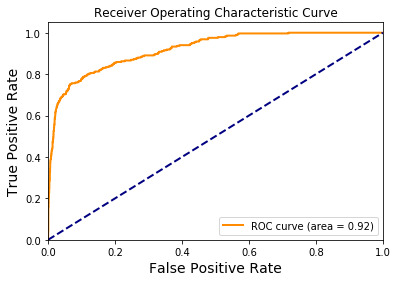

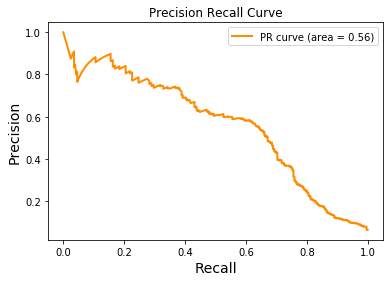

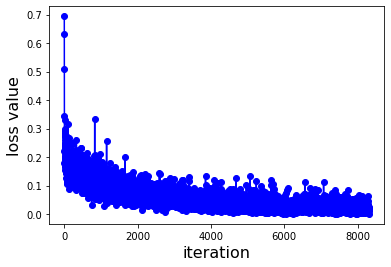

In [4]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [6]:
X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub('./data/')
target, target_name = load_SARS_CoV_Protease_3CL()

_ = models.repurpose(X_repurpose, target, 
                     model, drug_cid, target_name, 
                     convert_y = False)

repurposing...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
splitting dataset...
Done.
predicting...
---------------
Drug Repurposing Result for SARS-CoV 3CL Protease
+------+-------------+-----------------------+-------------+-------------+
| Rank |  Drug Name  |      Target Name      | Interaction | Probability |
+------+-------------+-----------------------+-------------+-------------+
|  1   |  1549000.0  | SARS-CoV 3CL Protease |      NO     |     0.04    |
|  2   |    3658.0   | SARS-CoV 3CL Protease |      NO     |     0.04    |
|  3   |    4850.0   | SARS-CoV 3CL Protease |      NO     |     0.04    |
|  4   |    3627.0   | SARS-CoV 3CL Protease |      NO     |     0.03    |
|  5   |    4615.0   | SARS-CoV 3CL Protease |      NO     |     0.02    |
|  6   |   127902.0  | SARS-CoV 3CL Protease |      NO     |     0.02    |
|  7   |   480953.0  | SARS-CoV 3

| 4484 |  25126798.0 | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4485 |    3994.0   | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4486 |   33919.0   | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4487 |   107994.0  | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4488 |  57519748.0 | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4489 |   210332.0  | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4490 |   107985.0  | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4491 |  2733484.0  | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4492 |    305.0    | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4493 |  3086401.0  | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4494 |   107848.0  | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4495 |    2006.0   | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4496 |     UNK     | SARS-CoV 3CL Protease |      NO     |     0.00    |
| 4497 |    9681.0   | SA

In [7]:
_ = models.virtual_screening(X_repurpose, np.random.choice(X_target, len(X_repurpose)), 
                     model, drug_cid, ['Protein '+ str(i) for i in range(len(X_repurpose))], 
                     convert_y = False)

virtual screening...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
drug encoding finished...
encoding protein...
unique target sequence: 379
protein encoding finished...
splitting dataset...
Done.
predicting...
---------------
Virtual Screening Result
+------+-------------+--------------+-------------+-------------+
| Rank |  Drug Name  | Target Name  | Interaction | Probability |
+------+-------------+--------------+-------------+-------------+
|  1   |  9933475.0  | Protein 2454 |     YES     |     1.00    |
|  2   |    5966.0   | Protein 1845 |     YES     |     0.99    |
|  3   |    5944.0   | Protein 3748 |     YES     |     0.99    |
|  4   |    4753.0   | Protein 3461 |     YES     |     0.99    |
|  5   |  5478883.0  | Protein 990  |     YES     |     0.99    |
|  6   |  5281613.0  | Protein 2261 |     YES     |     0.98    |
|  7   |  25073775.0 | Protein 2677 |     YES     |     0.98    |
|  8   |    5572.0   | Protein 4865 |     YES     |     0.98    |

| 4348 |   119565.0  | Protein 5284 |      NO     |     0.00    |
| 4349 |   21109.0   | Protein 1491 |      NO     |     0.00    |
| 4350 |   29083.0   | Protein 3613 |      NO     |     0.00    |
| 4351 |  11232124.0 | Protein 3653 |      NO     |     0.00    |
| 4352 |   438981.0  | Protein 2451 |      NO     |     0.00    |
| 4353 |  3248000.0  | Protein 3135 |      NO     |     0.00    |
| 4354 |    7638.0   | Protein 5923 |      NO     |     0.00    |
| 4355 |  58496428.0 | Protein 2077 |      NO     |     0.00    |
| 4356 |    5564.0   | Protein 187  |      NO     |     0.00    |
| 4357 |    6317.0   | Protein 791  |      NO     |     0.00    |
| 4358 |  2875918.0  | Protein 1417 |      NO     |     0.00    |
| 4359 |   15664.0   | Protein 1528 |      NO     |     0.00    |
| 4360 |  10437018.0 | Protein 1497 |      NO     |     0.00    |
| 4361 |  5974189.0  | Protein 1744 |      NO     |     0.00    |
| 4362 |    2910.0   | Protein 5122 |      NO     |     0.00    |
| 4363 |  